<a href="https://colab.research.google.com/github/Russia31/dap-2024/blob/main/les04/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4.
# Анализ данных пассажиров "Титаника"

Гибель Титаника – одно из самых печально известных кораблекрушений в истории.

15 апреля 1912 года во время своего первого плавания считавшийся «непотопляемым» «Титаник» затонул после столкновения с айсбергом.
К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, в результате чего погибли 1502 из 2224 пассажиров и членов экипажа.

Используя набор данных titanic.csv выполните следующие 10 заданий.

In [ ]:
import numpy as np
import pandas as pd


1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId"

In [ ]:
import numpy as np
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
fr

2. Просмотрите первые 6 строк

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
first_6_rows = fr.head(6)
first_6_rows.to_excel("first_6_rows.xlsx", index=True)

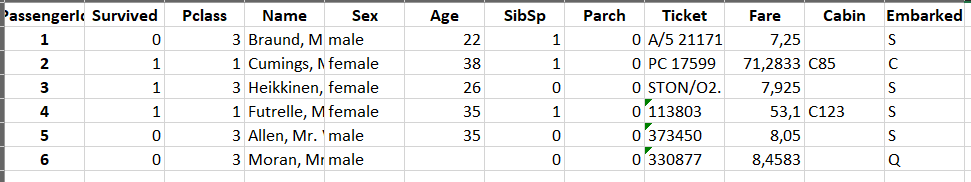

3. Выведите описание данных

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
description = fr.describe()
description.to_excel("data_description.xlsx")


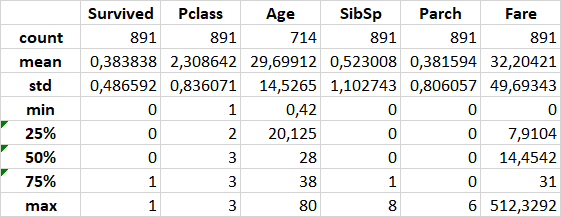

4. Сколько мужчин / женщин находилось на борту?

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
male = fr["Sex"] == "male"
female = fr["Sex"] == "female"
print("male:", len(fr[male]))
print("female:", len(fr[female]))

male: 577
female: 314

4. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
pclass_counts = fr['Pclass'].value_counts().sort_index()
pclass_men_counts = fr[fr['Sex'] == 'male']['Pclass'].value_counts().sort_index()
pclass_women_counts = fr[fr['Sex'] == 'female']['Pclass'].value_counts().sort_index()
men_second_class_count = pclass_men_counts.get(2, 0)

print("Распределение для всех пассажиров:")
print(pclass_counts)
print("\nРаспределение для мужчин:")
print(pclass_men_counts)
print("\nРаспределение для женщин:")
print(pclass_women_counts)
print(f"\nКоличество мужчин 2-го класса: {men_second_class_count}")


Распределение для всех пассажиров:

1    216

2    184

3    491


Распределение для мужчин:

1    122

2    108

3    347

Распределение для женщин:

1     94

2     76

3    144

Количество мужчин 2-го класса: 108

5. Каковы медиана и среднеквадрати́чное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")

median_fare = fr['Fare'].median()
std_fare = fr['Fare'].std()
median_fare_rounded = round(median_fare, 2)
std_fare_rounded = round(std_fare, 2)

print(f"Медиана платежей: {median_fare_rounded}")
print(f"Среднеквадратичное отклонение платежей: {std_fare_rounded}")


Медиана платежей: 14.45

Среднеквадратичное отклонение платежей: 49.69


6. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")

young = fr[fr['Age'] < 30]
old = fr[fr['Age'] > 60]
young_survival_rate = young['Survived'].mean()
old_survival_rate = old['Survived'].mean()

print(f"Доля выживших среди пассажиров моложе 30 лет: {round(young_survival_rate, 2)}")
print(f"Доля выживших среди пассажиров старше 60 лет: {round(old_survival_rate, 2)}")


Доля выживших среди пассажиров моложе 30 лет: 0.41

Доля выживших среди пассажиров старше 60 лет: 0.23

7. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")

women = fr[fr['Sex'] == 'female']
men = fr[fr['Sex'] == 'male']
women_survival_rate = women['Survived'].mean()
men_survival_rate = men['Survived'].mean()

print(f"Доля выживших среди женщин: {round(women_survival_rate, 2)}")
print(f"Доля выживших среди мужчин: {round(men_survival_rate, 2)}")


Доля выживших среди женщин: 0.74

Доля выживших среди мужчин: 0.19

8.  Найдите самое популярное имя среди пассажиров Титаника мужского пола?

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")

list = []
for name, row in fr.iterrows():
    if row['Sex'] == 'male':
        list.append(row['Name'].split()[2])
most_common_name = max(set(list), key=list.count)
print(f"Самое популярное имя среди мужчин: {most_common_name}")


Самое популярное имя среди мужчин: William



9. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

    В среднем мужчины 1-го класса старше 40 лет
    В среднем женщины 1-го класса старше 40 лет
    Мужчины всех классов в среднем старше женщин того же класса
    В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса



In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
male_first_class_above_40 = fr[(fr["Sex"]=="male") & (fr["Pclass"]==1)]["Age"].mean() > 40
print("Средний возраст мужчин 1-го класса старше 40:", male_first_class_above_40)
female_first_class_above_40 = fr[(fr["Sex"]=="female") & (fr["Pclass"]==1)]["Age"].mean() > 40
print("Средний возраст мужчин 1-го класса старше 40:", female_first_class_above_40)

average_age_comparison = (fr[fr["Sex"]=="male"].groupby("Pclass")["Age"].mean() > fr[fr["Sex"]=="female"].groupby("Pclass")["Age"].mean())
print("Мужчины старше женщин в каждом классе:", average_age_comparison.tolist())

age_p = fr.groupby("Pclass")["Age"].mean()
age_pf= age_p.loc[1] > age_p.loc[2] > age_p.loc[3]
print("Средний возраст по классам (1 > 2 > 3):", age_pf)


Средний возраст мужчин 1-го класса старше 40: True

Средний возраст мужчин 1-го класса старше 40: False

Мужчины старше женщин в каждом классе: [True, True, True]

Средний возраст по классам (1 > 2 > 3): True

10. Сравните возраст у спасенных и у погибших пасажиров. Средний возраст погибших выше, верно?

In [ ]:
import pandas as pd
fr = pd.read_csv("titanic.csv", index_col="PassengerId")
survived=fr[fr["Survived"]==1]['Age'].mean()
died=fr[fr["Survived"]==0]['Age'].mean()
print(survived)
print(died)
if died > survived:
    print("Средний возраст погибших пассажиров выше, чем у спасённых.")
else:
    print("Средний возраст спасённых пассажиров выше, чем у погибших.")

28.343689655172415

30.62617924528302

Средний возраст погибших пассажиров выше, чем у спасённых.

### Дополнительные вопросы для защиты

1. Что такое медиана? Рассчитать медиану для предложенного ряда чисел.

Медиана — это значение, которое делит отсортированный ряд данных на две равные части: половина значений будет меньше медианы, а другая половина — больше. Медиана используется для характеристики центральной тенденции данных, особенно когда данные имеют выбросы или распределены асимметрично.


```
import numpy as np
data = [10, 15, 7, 25, 30]
median = np.median(data)
print(median)

```


2. Что такое дисперсия? Рассчитать дисперсию для предложенного ряда чисел.

Дисперсия — это мера разброса данных вокруг среднего значения. Она рассчитывается как среднее квадратичное отклонение от среднего значения для всех элементов ряда.



```
data = [10, 15, 7, 25, 30]
variance = np.var(data)
print(variance)

```


3. Что такое среднеквадратичное отклонение? Рассчитать среднеквадратичное отклонение для предложенного ряда чисел.

Среднеквадратичное отклонение — это квадратный корень из дисперсии. Оно также характеризует разброс данных, но в тех же единицах измерения, что и сами данные.


```
std_deviation = np.std(data)
print(std_deviation)

```

4. Что такое Series и чем он отличается от DataFrame

Series — это одномерный массив с индексами, аналогичный списку в Python, но с возможностью привязать каждый элемент к метке (индексу). DataFrame — это двумерная структура данных, которая состоит из нескольких Series. Это аналог таблицы в базе данных или Excel, где каждый столбец представляет собой Series.

5. Можно ли изменить индекс в Series после создания объекта?

Да, индекс в Series можно изменить с помощью метода .set_index() или путем прямого присваивания нового индекса.

6. Можно ли выполнить операцию сложения над двумя объектами Series, если они имеют:
- одинаковые типы данных, одинаковые размеры и одинаковые индексы? Да, можно. Это приведет к поэлементному сложению значений.
- одинаковые типы данных, одинаковые размеры, но разные индексы? Да, будет выполнено выравнивание по индексам, а если индекс не совпадает, то результат будет NaN для тех элементов, где нет совпадений.
- одинаковые типы данных, разные размеры и одинаковые индексы? Нет, размер должен быть одинаковым. Если это не так, возникнет ошибка.
- разные типы данных, одинаковые размеры и одинаковые индексы? Нет, при попытке сложить данные разных типов произойдет преобразование типов, а если это невозможно, возникнет ошибка.
- разные типы данных, одинаковые размеры и разные индексы? Как и в предыдущем случае, типы данных должны быть совместимы для выполнения операции, иначе будет ошибка.
- разные типы данных, разные размеры и разные индексы? Нет, операция сложения невозможна при разных типах, индексах и размерах.
7. Что такое DataFrame и чем он отличается от Series

DataFrame — это двумерная структура данных, которая представляет собой таблицу с метками по строкам и столбцам. В отличие от Series, которая является одномерным объектом, DataFrame может содержать несколько столбцов с разными типами данных.

8. Что необходимо сделать, чтобы число строк в DateFrame при его просмотре, по умолчанию составляло 8?

Чтобы установить количество строк, отображаемых при выводе DataFrame по умолчанию, нужно изменить настройки отображения с помощью pd.set_option():
      
      import pandas as pd
      pd.set_option('display.max_rows', 8)

9. Чем отличается метод iloc от метода loс

* iloc — используется для индексации по позициям (целочисленные индексы).

* loc — используется для индексации по меткам (именам индексов).

10. Можно ли добавить в DateFrame дополнительный Series?

Да, можно добавить новый столбец в DataFrame, присвоив Series новому столбцу.

```
df['C'] = pd.Series([7, 8, 9])
print(df)

```
11. Требуются ли установка дополнительных библиотек для загрузки с помощью pandas файлов в формате CSV? Excel (.xls)? Json?

* Для загрузки CSV файлов с помощью pandas дополнительная установка не требуется.
* Для работы с Excel (.xls) файлами нужно установить библиотеку openpyxl или xlrd
* Для работы с JSON файлами установка дополнительных библиотек не требуется, так как pandas поддерживает работу с JSON из коробки.